In [2]:
%matplotlib inline

# Deferred Shading - Analysis

## raw data

In [3]:
import json
from pathlib import Path

import pandas as pd
import numpy as np

In [4]:
RAW_DATA_ROOT = Path("C:/Users/Monthy/Documents/projects/thesis/thesis-data-suite/data/raw/forward_deferred")

SCENES = { "pipers-alley" : [  "58#1x_1y_1z"

                            , "116#1x_1y_2z"
                            , "116#1x_2y_1z"
                            , "116#2x_1y_1z"

                            , "174#1x_1y_3z"
                            , "174#1x_3y_1z"
                            , "174#3x_1y_1z"

                            , "232#1x_2y_2z"
                            , "232#2x_1y_2z"
                            , "232#2x_2y_1z"

                            , "348#1x_2y_3z"
                            , "348#1x_3y_2z"
                            , "348#2x_1y_3z"
                            , "348#2x_3y_1z"
                            , "348#3x_2y_1z"
                            , "348#3x_1y_2z"

                            , "464#2x_2y_2z"

                            , "522#1x_3y_3z"
                            , "522#3x_1y_3z"
                            , "522#3x_3y_1z"

                            , "696#2x_2y_3z"
                            , "696#2x_3y_2z"
                            , "696#3x_2y_2z"

                            , "1044#2x_3y_3z"
                            , "1044#3x_2y_3z"
                            , "1044#3x_3y_2z"
                            ]
         , "ziggurat-city" : [ "65#1x_1y_1z"

                             , "130#1x_1y_2z"
                             , "130#1x_2y_1z"
                             , "130#2x_1y_1z"

                             , "195#3x_1y_1z"
                             , "195#1x_3y_1z"
                             , "195#1x_1y_3z"

                             , "260#1x_2y_2z"
                             , "260#2x_1y_2z"
                             , "260#2x_2y_1z"

                             , "390#1x_2y_3z"
                             , "390#1x_3y_2z"
                             , "390#2x_1y_3z"
                             , "390#2x_3y_1z"
                             , "390#3x_2y_1z"
                             , "390#3x_1y_2z"

                             , "520#2x_2y_2z"

                             , "585#1x_3y_3z"
                             , "585#3x_1y_3z"
                             , "585#3x_3y_1z"

                             , "780#2x_2y_3z"
                             , "780#2x_3y_2z"
                             , "780#3x_2y_2z"

                             , "1170#2x_3y_3z"
                             , "1170#3x_2y_3z"
                             , "1170#3x_3y_2z"
                             ]
         , "spaceship-indoor" : [ "70#1x_1y_1z"

                                , "140#1x_1y_2z"
                                , "140#1x_2y_1z"
                                , "140#2x_1y_1z"

                                , "210#1x_1y_3z"
                                , "210#1x_3y_1z"
                                , "210#3x_1y_1z"

                                , "280#1x_2y_2z"
                                , "280#2x_1y_2z"
                                , "280#2x_2y_1z"

                                , "420#1x_2y_3z"
                                , "420#1x_3y_2z"
                                , "420#2x_1y_3z"
                                , "420#2x_3y_1z"
                                , "420#3x_1y_2z"
                                , "420#3x_2y_1z"

                                , "560#2x_2y_2z"

                                , "630#1x_3y_3z"
                                , "630#3x_1y_3z"
                                , "630#3x_3y_1z"

                                , "840#2x_2y_3z"
                                , "840#2x_3y_2z"
                                , "840#3x_2y_2z"

                                , "1260#2x_3y_3z"
                                , "1260#3x_2y_3z"
                                , "1260#3x_3y_2z"
                                ]
         }


RESOLUTIONS = [ 160
              , 320
              , 640
              , 960
              , 1280
              , 1920
              , 2560
              ]

PIPELINE_TYPES = [ "forward"
                 , "deferred" 
                 ]

In [5]:
def json_to_dataframe(json_dic : dict) -> pd.DataFrame:
    '''
    Convert a json data file spit out by nTiled into something just slightly more useful
    '''
    # get all functions tracked from first frame
    frames = json_dic["frames"]
    functions = list(x for x in frames[0]["functions"])
    
    # build empty dictionary which will be loaded with data from frames
    data_raw = { fn : {} for fn in functions }    
    frames_i = {}
    
    for f in frames:
        f_i = int(f["frame"])
        frames_i[f_i] = f_i
        for fn in functions:
            if fn in f["functions"]:
                data_raw[fn][f_i] = float(f["functions"][fn])
            
    data_series = {fn : pd.Series(data_raw[fn], name=fn) for fn in functions }
    data_series["index"] = pd.Series(frames_i, name="index")
    
    dataframe = pd.DataFrame(data_series)
    return dataframe

In [6]:
def retrieve_data():
    '''
    Retrieve all data created for deferred shading
    '''
    n_tests = 3
    
    data = {}
    
    RAW_DATA_ROOT
    
    pt_dict = {}
    for pt in PIPELINE_TYPES:
        path_pt = RAW_DATA_ROOT / Path(pt)
        
        scene_dict = {}
        for scene in SCENES:
            path_scene = path_pt / Path(scene)
            
            ld_dict = {}
            for light_def in SCENES[scene]:
                path_ld = path_scene / Path(light_def)
                
                res_dict = {}
                for res in RESOLUTIONS:
                    path_res = path_ld / Path("{}".format(res))
                    
                    dataframes = []
                    for i in range(n_tests):
                        file_path = path_res / Path("data_{}.json".format(i))
                        
                        with open(str(file_path), 'r') as f:
                            data_json = json.loads(f.read())
                            
                        dataframes.append(json_to_dataframe(data_json))
                        
                    res_dict[res] = dataframes
                ld_dict[light_def] = res_dict
            scene_dict[scene] = ld_dict
        pt_dict[pt] = scene_dict
    
    return pt_dict

In [7]:
data = retrieve_data()

## Plots

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf', 'svg')
matplotlib.rcParams['svg.fonttype'] = 'none'

### Frames

In [18]:
def average_tests(df_l : list) -> pd.DataFrame:
    frame_mean = pd.concat(df_l)
    by_row_index = frame_mean.groupby(frame_mean.index)
    df_means = by_row_index.mean()
    
    return df_means


def plot_frame(scene: str, res: int, l_def: str):
    df_forward = average_tests(data["forward"][scene][l_def][res])
    df_deferred = average_tests(data["deferred"][scene][l_def][res])
    
    col_list = list(x for x in df_deferred if x != 'index')
    df_deferred.loc[:, 'sum'] = df_deferred[col_list].sum(axis=1)
    
    sns.regplot("index", "ForwardAttenuatedShader::renderObjects", 
                data=df_forward, fit_reg=False, 
                label="Forward",
                scatter_kws={"s": 15})
    ax = sns.regplot("index", "sum", 
                     data=df_deferred, fit_reg=False, 
                     label="Deferred",
                     scatter_kws={"s": 15})
    
    ax.xaxis.labelpad = 10
    ax.yaxis.labelpad = 15
    ax.set(xlabel='Frame', ylabel='Uitvoeringstijd (ms)')
    
    
    plt.show()

#### Pipers Alley

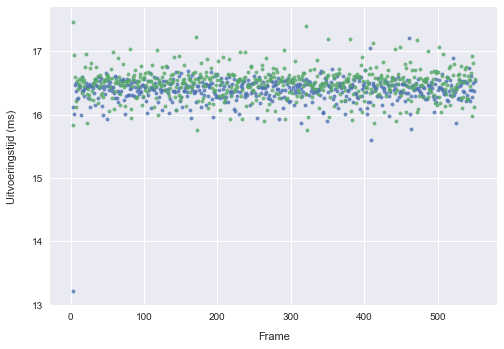

In [19]:
scene = "pipers-alley"

l_def = "58#1x_1y_1z"
res = 320
plot_frame(scene, res, l_def)

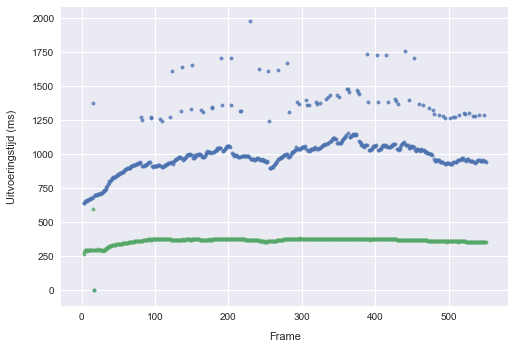

In [20]:
scene = "pipers-alley"

l_def = "1044#3x_3y_2z"
res = 2560
plot_frame(scene, res, l_def)

#### Ziggurat City

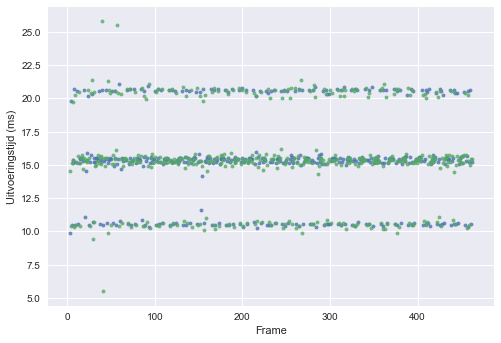

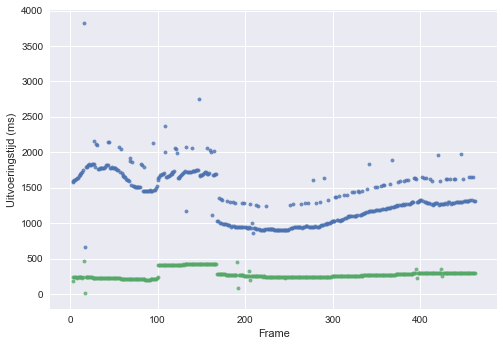

In [32]:
scene = "ziggurat-city"

l_def = "65#1x_1y_1z"
res = 320
plot_frame(scene, res, l_def)

l_def = "1170#3x_3y_2z"
res = 2560
plot_frame(scene, res, l_def)

#### Spaceship Indoor

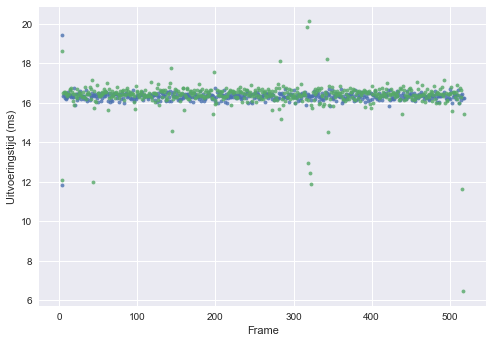

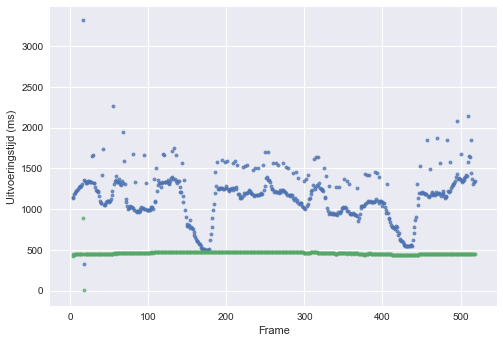

In [33]:
scene = "spaceship-indoor"
l_def = "70#1x_1y_1z"
res = 320
plot_frame(scene, res, l_def)

l_def = "1260#3x_3y_2z"
res = 2560
plot_frame(scene, res, l_def)

### Resolutions

In [38]:
def plot_resolution(scene: str, l_def: str):
    df_forward = pd.DataFrame([], columns=["execution_time", "resolution"])
    df_deferred = pd.DataFrame([], columns=["execution_time", "resolution"])
    
    index = 0
    
    for res in RESOLUTIONS:
        for i in range(3):
            df_forward.loc[index] = [data["forward"][scene][l_def][res][i].mean(axis=0).iloc[0], res]
            
            deferred_mean = data["deferred"][scene][l_def][res][i].mean(axis=0)
            df_deferred.loc[index] = [ deferred_mean.iloc[0] + deferred_mean.iloc[1], res ]
            
            index += 1

    sns.regplot("resolution", "execution_time", 
                data=df_forward, fit_reg=True, 
                label="Forward",
                x_estimator=np.mean,
                order=2,
                ci=100)        

    ax = sns.regplot("resolution", "execution_time", 
                     data=df_deferred, fit_reg=True, 
                     label="Deferred",
                     x_estimator=np.mean,
                     order=2,
                     ci=100)        

    ax.set(xlabel='Resolutie (px)', ylabel='Uitvoeringstijd (ms)')    
    plt.show()

#### Pipers Alley

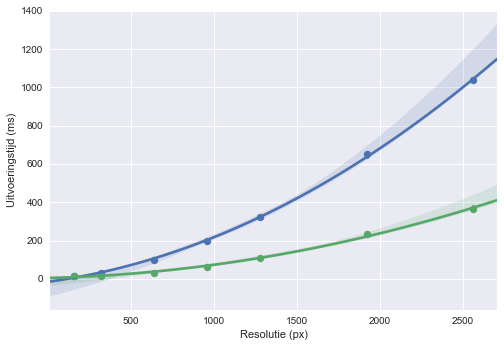

In [39]:
scene = "pipers-alley"
l_def = "1044#3x_3y_2z"
plot_resolution(scene, l_def)

#### Ziggurat City

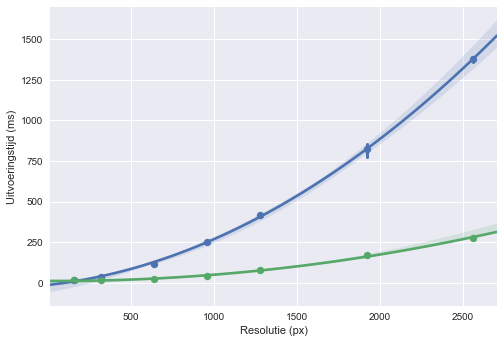

In [40]:
scene = "ziggurat-city"
l_def = "1170#3x_3y_2z"
plot_resolution(scene, l_def)

#### Spaceship Indoor

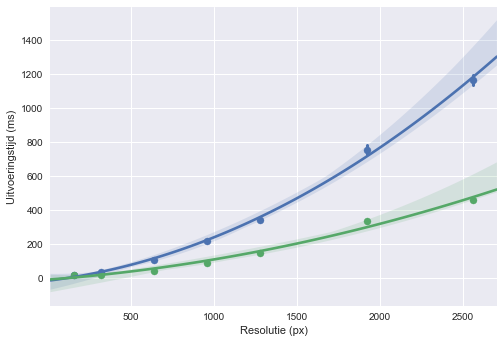

In [41]:
scene = "spaceship-indoor"
l_def = "1260#3x_3y_2z"
plot_resolution(scene, l_def)

### Lights

In [46]:
def plot_lights(scene: str, res: int):
    df_forward = pd.DataFrame([], columns=["execution_time", "n_lights"])
    df_deferred = pd.DataFrame([], columns=["execution_time", "n_lights"])
    
    index = 0
    
    for l_def in SCENES[scene]:
        n_lights = int(l_def.split('#')[0])
        for i in range(3):
            df_forward.loc[index] = [data["forward"][scene][l_def][res][i].mean(axis=0).iloc[0], n_lights]
            
            deferred_mean = data["deferred"][scene][l_def][res][i].mean(axis=0)
            df_deferred.loc[index] = [ deferred_mean.iloc[0] + deferred_mean.iloc[1], n_lights ]
            
            index += 1

    sns.regplot("n_lights", "execution_time", 
                data=df_forward, fit_reg=True, 
                label="Forward",
                x_estimator=np.mean,
                order=2,
                ci=100)        

    ax = sns.regplot("n_lights", "execution_time", 
                     data=df_deferred, fit_reg=True, 
                     label="Deferred",
                     x_estimator=np.mean,
                     order=1,
                     ci=100)        

    
    ax.set(xlabel='Aantal lichten', ylabel='Uitvoeringstijd (ms)')    
    plt.show()

#### Pipers Alley

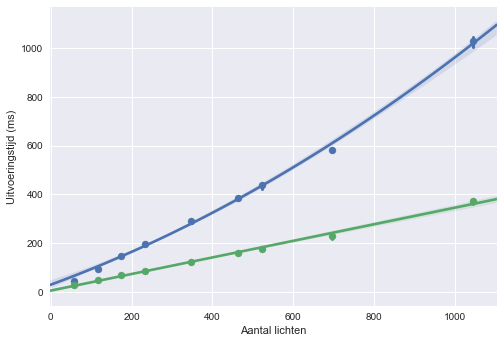

In [47]:
scene = "pipers-alley"
res = 2560
plot_lights(scene, res)

#### Ziggurat City

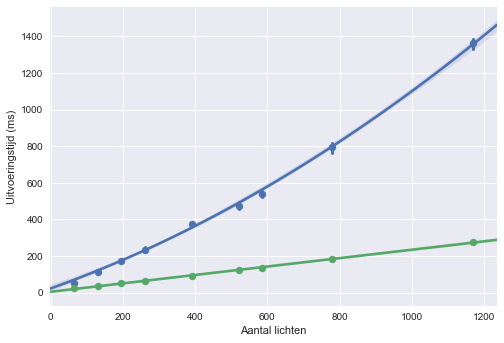

In [48]:
scene = "ziggurat-city"
res=2560
plot_lights(scene, res)

#### Spaceship Indoor

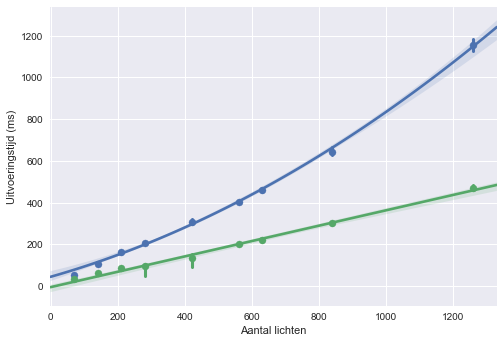

In [49]:
scene = "spaceship-indoor"
res=2560
plot_lights(scene, res)

## Export Plots

### Frames

In [23]:
def export_frame(scene: str, res: int, l_def: str):
    # Calculate data
    df_forward = average_tests(data["forward"][scene][l_def][res])
    df_deferred = average_tests(data["deferred"][scene][l_def][res])
    
    col_list = list(x for x in df_deferred if x != 'index')
    df_deferred.loc[:, 'sum'] = df_deferred[col_list].sum(axis=1)
    
    # Create Plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    sns.regplot("index", "ForwardAttenuatedShader::renderObjects", 
                data=df_forward, fit_reg=False, 
                ax=ax,
                label="Forward",
                scatter_kws={"s": 15})
    sns.regplot("index", "sum", 
                data=df_deferred, fit_reg=False, 
                ax=ax,
                label="Deferred",
                scatter_kws={"s": 15})
    
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 25
    ax.set(xlabel='Frame', ylabel='Uitvoeringstijd (ms)')
    
    # Export file
    path = Path("./graphs_002/frames/{}/".format(scene))
    
    if not path.exists() or path.is_file():
        path.mkdir(parents=True)
        
    output_path = path / Path("frames_{}_{}.svg".format(res, l_def.split("#")[0]))
    fig.savefig(str(output_path), bbox_inches='tight')
    
    plt.close(fig)

In [24]:
scene = "pipers-alley"
l_def = "58#1x_1y_1z"
res = 320
export_frame(scene, res, l_def)
l_def = "1044#3x_3y_2z"
res = 2560
export_frame(scene, res, l_def)

scene = "spaceship-indoor"
l_def = "70#1x_1y_1z"
res = 320
export_frame(scene, res, l_def)
l_def = "1260#3x_3y_2z"
res = 2560
export_frame(scene, res, l_def)

scene = "ziggurat-city"
l_def = "65#1x_1y_1z"
res = 320
export_frame(scene, res, l_def)
l_def = "1170#3x_3y_2z"
res = 2560
export_frame(scene, res, l_def)

### Resolution

In [25]:
def export_resolution(scene: str, l_def: str):
    # Calculate data
    df_forward = pd.DataFrame([], columns=["execution_time", "resolution"])
    df_deferred = pd.DataFrame([], columns=["execution_time", "resolution"])
    
    index = 0
    
    for res in RESOLUTIONS:
        for i in range(3):
            df_forward.loc[index] = [data["forward"][scene][l_def][res][i].mean(axis=0).iloc[0], res]
            
            deferred_mean = data["deferred"][scene][l_def][res][i].mean(axis=0)
            df_deferred.loc[index] = [ deferred_mean.iloc[0] + deferred_mean.iloc[1], res ]
            
            index += 1

    # Create Plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

            
    sns.regplot("resolution", "execution_time", 
                data=df_forward, fit_reg=True, 
                ax=ax,
                label="Forward",
                x_estimator=np.mean,
                order=2,
                ci=100)        

    sns.regplot("resolution", "execution_time", 
                data=df_deferred, fit_reg=True, 
                ax=ax,
                label="Deferred",
                x_estimator=np.mean,
                order=2,
                ci=100)   
    
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 25
    
    ax.set(xlabel='Resolutie (px)', ylabel='Uitvoeringstijd (ms)') 
    ax.set(ylim=(-49, None))

    # Export file
    path = Path("./graphs_002/resolution/{}/".format(scene))
    
    if not path.exists() or path.is_file():
        path.mkdir(parents=True)
        
    output_path = path / Path("resolution_{}.svg".format(l_def.split("#")[0]))
    fig.savefig(str(output_path), bbox_inches='tight')
    
    plt.close(fig)

In [26]:
scene = "pipers-alley"
l_def = "1044#3x_3y_2z"
export_resolution(scene, l_def)

scene = "ziggurat-city"
l_def = "1170#3x_3y_2z"
export_resolution(scene, l_def)

scene = "spaceship-indoor"
l_def = "1260#3x_3y_2z"
export_resolution(scene, l_def)

### Lights

In [27]:
def export_lights(scene: str, res: int):
    # Calculate data
    df_forward = pd.DataFrame([], columns=["execution_time", "n_lights"])
    df_deferred = pd.DataFrame([], columns=["execution_time", "n_lights"])
    
    index = 0
    
    for l_def in SCENES[scene]:
        n_lights = int(l_def.split('#')[0])
        for i in range(3):
            df_forward.loc[index] = [data["forward"][scene][l_def][res][i].mean(axis=0).iloc[0], n_lights]
            
            deferred_mean = data["deferred"][scene][l_def][res][i].mean(axis=0)
            df_deferred.loc[index] = [ deferred_mean.iloc[0] + deferred_mean.iloc[1], n_lights ]
            
            index += 1

    # Create Plot
    fig = plt.figure()
    ax = fig.add_subplot(111)

            
    sns.regplot("n_lights", "execution_time", 
                data=df_forward, fit_reg=True, 
                ax=ax,
                label="Forward",
                x_estimator=np.mean,
                order=2,
                ci=100)        

    sns.regplot("n_lights", "execution_time", 
                data=df_deferred, fit_reg=True, 
                ax=ax,
                label="Deferred",
                x_estimator=np.mean,
                order=1,
                ci=100)        

    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 25

    ax.set(xlabel='Aantal lichten', ylabel='Uitvoeringstijd (ms)')
    ax.set(ylim=(-49, None))

    # Export file
    path = Path("./graphs_002/lights/{}/".format(scene))
    
    if not path.exists() or path.is_file():
        path.mkdir(parents=True)
        
    output_path = path / Path("lights_{}.svg".format(res))
    fig.savefig(str(output_path), bbox_inches='tight')
    
    plt.close(fig)    

In [28]:
res = 2560

for scene in SCENES:
    export_lights(scene, res)